# 1. Note:

This lab is about Dimensionality Reduction, which is related to Q13 of Assignment 1.

Q13: Process dimensionality reduction just using one technique and explain your decision.

# 2. Load required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load data

In [2]:
path = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)

# 4. Find out basic information

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
3,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
4,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [5]:
df.shape

(5109, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
for k in range(df.shape[1]):
    if df[df.columns[k]].dtypes == 'object':
        df[df.columns[k]] = df[df.columns[k]].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5109 non-null   int64   
 1   gender             5109 non-null   category
 2   age                5109 non-null   float64 
 3   hypertension       5109 non-null   int64   
 4   heart_disease      5109 non-null   int64   
 5   ever_married       5109 non-null   category
 6   work_type          5109 non-null   category
 7   Residence_type     5109 non-null   category
 8   avg_glucose_level  5109 non-null   float64 
 9   bmi                4908 non-null   float64 
 10  smoking_status     5109 non-null   category
 11  stroke             5109 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.2 KB


In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [10]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [11]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [12]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [13]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Or here we can use a Decision Tree to predict the missing BMI

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [15]:
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])

X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [16]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [17]:
df.drop(columns = ['id'],inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   int64   
 3   heart_disease      5109 non-null   int64   
 4   ever_married       5109 non-null   category
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.3 KB


# 5. Data Transformation - numerical variables

## non-normality (numerical)

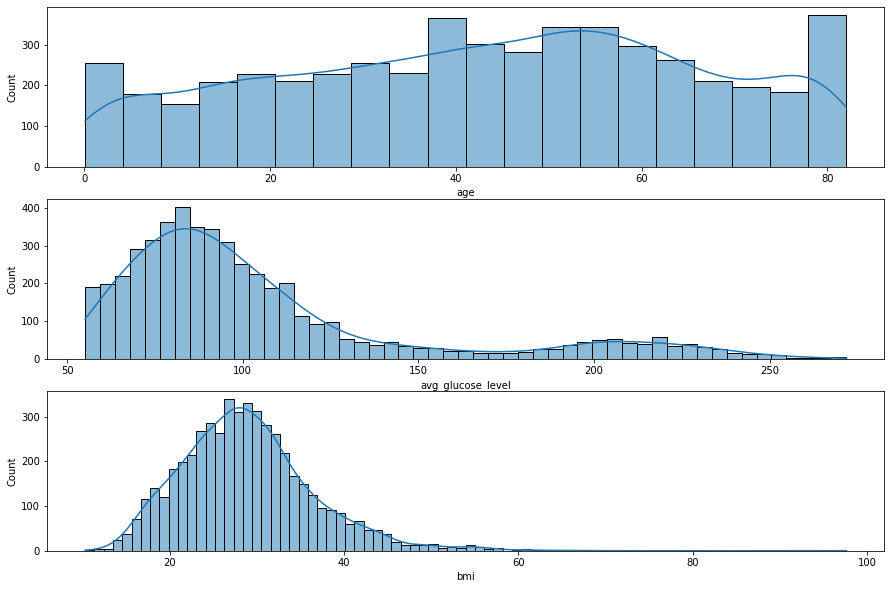

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(311)
sns.histplot(df.age,kde=True)
plt.subplot(312)
sns.histplot(df.avg_glucose_level,kde=True)
plt.subplot(313)
sns.histplot(df.bmi,kde=True)
plt.show()

## outliners

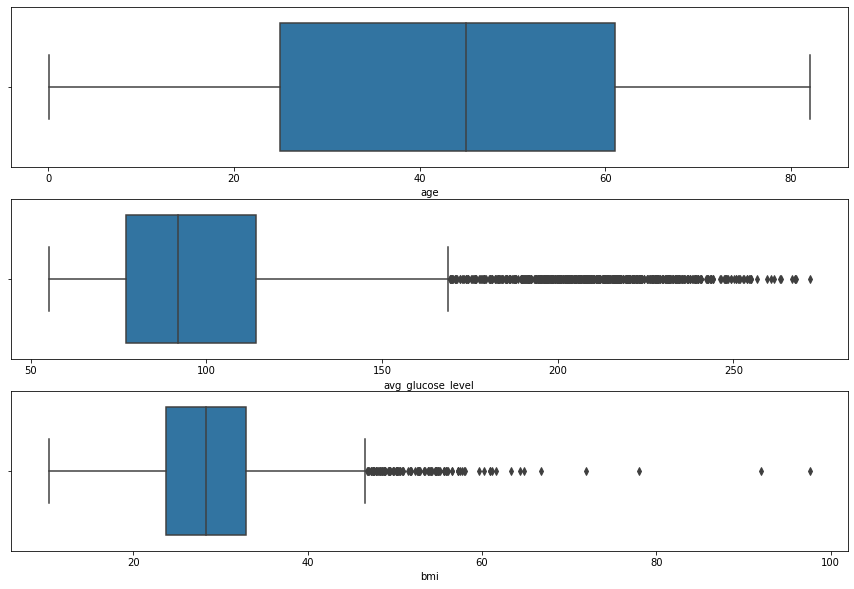

In [20]:
plt.figure(figsize = (15,10))
plt.subplot(311)
sns.boxplot(x=df.age)
plt.subplot(312)
sns.boxplot(x=df.avg_glucose_level)
plt.subplot(313)
sns.boxplot(x=df.bmi)
plt.show()

## Spot outliers (numeric variables)

In [21]:
df['avg_glucose_level_cut'] = pd.cut(df.avg_glucose_level, [50,80,100,125,200,300],labels =[1,2,3,4,5])
df.avg_glucose_level_cut.value_counts()

2    1599
1    1532
3     979
4     565
5     434
Name: avg_glucose_level_cut, dtype: int64

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
xbar = df.bmi.mean()
xstd = df.bmi.std()
LTV = xbar - 2 * xstd
UTV = xbar + 2 * xstd
replace_value=df.bmi[df['bmi'] < UTV].max()
df['bmi_rep']=df.bmi
df.bmi_rep[df['bmi_rep'] > UTV] = replace_value
replace_value

44.3

<AxesSubplot:xlabel='bmi_rep', ylabel='Count'>

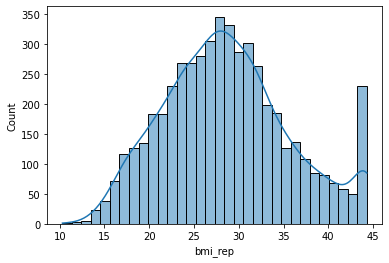

In [24]:
sns.histplot(df.bmi_rep,kde=True)

<AxesSubplot:xlabel='bmi_rep'>

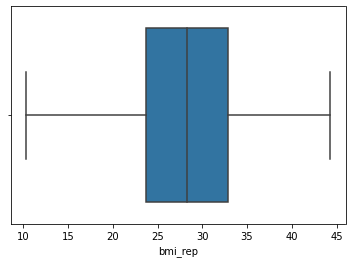

In [25]:
sns.boxplot(x=df.bmi_rep)

# 6. Encoding or making dummies for categorical variables

In [26]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes':0,'No':1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':-1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cut,bmi_rep
0,0,67.0,0,1,0,0,1,228.69,36.600000,1,1,5,36.600000
1,0,80.0,0,1,0,0,0,105.92,32.500000,0,1,3,32.500000
2,0,81.0,0,0,0,0,1,186.21,29.000000,1,1,4,29.000000
3,0,74.0,1,1,0,0,0,70.09,27.400000,0,1,1,27.400000
4,0,78.0,0,1,0,0,1,219.84,27.247222,255,1,5,27.247222


# 7. Analysis of target class

In [28]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

Our target class is quite unimbalance, but our data is biased, we can fix this with SMOTE.
 
In next lab for modeling, SMOTE will be used to deal with the imbalanced data.

In [29]:
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


# 8. Dimensionality Reduction - Feature Selection

Filter Model

    -hypothesis test

    -feature_selction.SelectKBest

Recursive Feature Elimination
 
    -logistic regression
 
    -random forest

## 8.1.1 Hypothesis test

### numeric variables: t - tests

In [30]:
bmi_rep_score_0 = df.bmi_rep[df.stroke == 0]
bmi_rep_score_1 = df.bmi_rep[df.stroke == 1]

In [31]:
from scipy import stats
bmi_rep_coef, bmi_rep_score_p = stats.ttest_ind(bmi_rep_score_0,bmi_rep_score_1)
print(bmi_rep_coef.round(4), '\n',bmi_rep_score_p.round(4))

-3.5529 
 0.0004


Therefore, we reject H0 and conclude that there is a significant difference between 'bmi_rep’ of promoter and 'is_stroke', so there is a relationship between 'bmi_rep' and 'is_stroke'.

### Categorical Variables : Chi-Square 
    -between dependent variable and independent variable

In [32]:
avg_glucose_level_cut_crosstable = pd.crosstab(df.avg_glucose_level_cut,df.stroke)
avg_glucose_level_cut_crosstable

stroke,0,1
avg_glucose_level_cut,,
1,1469,63
2,1550,49
3,942,37
4,521,44
5,378,56


In [33]:
avg_c,avg_p, avg_d, avg_g = stats.chi2_contingency(avg_glucose_level_cut_crosstable)
if avg_c>0.05:
    avg_infer = 'Fail to Reject H0'
else:
    avg_infer = 'Reject H0'
    
avg_glucose_level_chi = [avg_c.round(4),avg_p.round(4),avg_infer]
print(avg_glucose_level_chi)

[86.4362, 0.0, 'Fail to Reject H0']


In [34]:
gender_crosstable = pd.crosstab(df.gender,df.stroke)
gender_crosstable

stroke,0,1
gender,,
0,2007,108
1,2853,141


In [35]:
gender_c, gender_p, gender_d, gender_g = stats.chi2_contingency(gender_crosstable)
if gender_c>0.05:
    gender_infer = 'Fail to Reject H0'
else:
    gender_infer = 'Reject H0'
    
gender_chi = [gender_c.round(4),gender_p.round(4),gender_infer]
print(gender_chi)

[0.34, 0.5598, 'Fail to Reject H0']


In [36]:
hypertension_crosstable = pd.crosstab(df.hypertension,df.stroke)
hypertension_crosstable

stroke,0,1
hypertension,,
0,4428,183
1,432,66


In [37]:
hyp_c, hyp_p, hyp_d, hyp_g = stats.chi2_contingency(hypertension_crosstable)
if hyp_c>0.05:
    hyp_infer = 'Fail to Reject H0'
else:
    hyp_infer = 'Reject H0'
    
hyp_chi = [gender_c.round(4),gender_p.round(4),hyp_infer]
print(hyp_chi)

[0.34, 0.5598, 'Fail to Reject H0']


In [38]:
heart_disease_crosstable = pd.crosstab(df.heart_disease,df.stroke)
heart_disease_crosstable

stroke,0,1
heart_disease,,
0,4631,202
1,229,47


In [39]:
health_c, health_p, health_d, health_g = stats.chi2_contingency(heart_disease_crosstable)
if health_c>0.05:
    health_infer = 'Fail to Reject H0'
else:
    health_infer = 'Reject H0'
    
health_chi = [gender_c.round(4),gender_p.round(4),health_infer]
print(health_chi)

[0.34, 0.5598, 'Fail to Reject H0']


In [40]:
ever_married_crosstable = pd.crosstab(df.ever_married,df.stroke)
ever_married_crosstable

stroke,0,1
ever_married,,
0,3133,220
1,1727,29


In [41]:
married_c, married_p, married_d, married_g = stats.chi2_contingency(ever_married_crosstable)
if married_c>0.05:
    married_infer = 'Fail to Reject H0'
else:
    married_infer = 'Reject H0'
    
married_chi = [married_c.round(4),married_p.round(4),married_infer]
print(married_chi)

[58.8678, 0.0, 'Fail to Reject H0']


In [42]:
work_type_crosstable = pd.crosstab(df.work_type,df.stroke)
work_type_crosstable

stroke,0,1
work_type,,
0,2775,149
1,754,65
2,624,33
254,22,0
255,685,2


In [43]:
work_c, work_p, work_d, work_g = stats.chi2_contingency(work_type_crosstable)
if work_c>0.05:
    work_infer = 'Fail to Reject H0'
else:
    work_infer = 'Reject H0'
    
work_chi = [work_c.round(4),work_p.round(4),work_infer]
print(work_chi)

[49.1591, 0.0, 'Fail to Reject H0']


In [44]:
Residence_type_crosstable = pd.crosstab(df.Residence_type,df.stroke)
Residence_type_crosstable

stroke,0,1
Residence_type,,
0,2399,114
1,2461,135


In [45]:
Res_c, Res_p, Res_d, Res_g = stats.chi2_contingency(Residence_type_crosstable)
if Res_c>0.05:
    Res_infer = 'Fail to Reject H0'
else:
    Res_infer = 'Reject H0'
    
Res_chi = [Res_c.round(4),Res_p.round(4),Res_infer]
print(Res_chi)

[1.075, 0.2998, 'Fail to Reject H0']


In [46]:
chi2Test = pd.DataFrame([avg_glucose_level_chi,gender_chi,hyp_chi,health_chi,married_chi,work_chi,Res_chi]).T
chi2Test.columns =['avg_glucose_level_cut','gender','hypertension','heart_disease','ever_married','work_type','Residence_type']
chi2Test.index = ['statistic','p value','Inference']
chi2Test = chi2Test.reset_index().rename(columns ={'index':'Chi2Test'})
chi2Test


,Chi2Test,avg_glucose_level_cut,gender,hypertension,heart_disease,ever_married,work_type,Residence_type
0,statistic,86.4362,0.34,0.34,0.34,58.8678,49.1591,1.075
1,p value,0.0,0.5598,0.5598,0.5598,0.0,0.0,0.2998
2,Inference,Fail to Reject H0,Fail to Reject H0,Fail to Reject H0,Fail to Reject H0,Fail to Reject H0,Fail to Reject H0,Fail to Reject H0


### Ordinal data: Mann-Whitney U test

In [47]:
smoke_0 = df.smoking_status[df.stroke == 0]
smoke_1 = df.smoking_status[df.stroke == 1]

In [48]:
smoke_s, smoke_p= stats.mannwhitneyu(smoke_0,smoke_1)
if smoke_p > 0.05:
    smoke_infer = 'Fail to reject H0'
else:
    smoke_infer= 'Reject H0'
    
smoke_mw= [smoke_s.round(4),smoke_p.round(4),smoke_infer]
smoke_mw

[554519.5, 0.0099, 'Reject H0']

In [49]:
promo_binary_MW = pd.DataFrame([smoke_mw]).T
promo_binary_MW.columns = ['smoking_status']
promo_binary_MW.index = ['statistic','pvalue','Reject H0 or not']
promo_binary_MW.reset_index().rename(columns={'index':'Mann-Whitney Test'})

,Mann-Whitney Test,smoking_status
0,statistic,554519.5
1,pvalue,0.0099
2,Reject H0 or not,Reject H0


## 8.1.2 Using sklearn.feature_selection.SelectKBest

### Prepare data

In [50]:
 from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif,chi2,f_regression

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 5109 non-null   uint8   
 1   age                    5109 non-null   float64 
 2   hypertension           5109 non-null   int64   
 3   heart_disease          5109 non-null   int64   
 4   ever_married           5109 non-null   uint8   
 5   work_type              5109 non-null   uint8   
 6   Residence_type         5109 non-null   uint8   
 7   avg_glucose_level      5109 non-null   float64 
 8   bmi                    5109 non-null   float64 
 9   smoking_status         5109 non-null   uint8   
 10  stroke                 5109 non-null   int64   
 11  avg_glucose_level_cut  5109 non-null   category
 12  bmi_rep                5109 non-null   float64 
dtypes: category(1), float64(4), int64(3), uint8(5)
memory usage: 309.7 KB


In [52]:
last = df.pop('stroke')
df.insert(12,'stroke',last)

In [53]:
X = df.iloc[:,0:-1].drop(columns=['avg_glucose_level','bmi'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 5109 non-null   uint8   
 1   age                    5109 non-null   float64 
 2   hypertension           5109 non-null   int64   
 3   heart_disease          5109 non-null   int64   
 4   ever_married           5109 non-null   uint8   
 5   work_type              5109 non-null   uint8   
 6   Residence_type         5109 non-null   uint8   
 7   smoking_status         5109 non-null   uint8   
 8   avg_glucose_level_cut  5109 non-null   category
 9   bmi_rep                5109 non-null   float64 
dtypes: category(1), float64(2), int64(2), uint8(5)
memory usage: 189.9 KB


In [54]:
y = df.iloc[:,-1:]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


### ANOVA: f_classif

In [55]:
selector_f = SelectKBest(f_classif, k = 6)
X_select_f= selector_f.fit_transform(X, np.ravel(y))
print(' number of rows:',len(X_select_f),'\n','number of columns:',len(X_select_f[0]))

 number of rows: 5109 
 number of columns: 6


In [56]:
col_f = selector_f.get_feature_names_out()
print(col_f)

['age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'avg_glucose_level_cut']


In [57]:
col_f_index = selector_f.get_support (indices = True)
col_f_index

array([1, 2, 3, 4, 5, 8], dtype=int64)

In [58]:
x_f = pd.DataFrame(X_select_f,columns = col_f)
x_f.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level_cut
0,67.0,0.0,1.0,0.0,0.0,5.0
1,80.0,0.0,1.0,0.0,0.0,3.0
2,81.0,0.0,0.0,0.0,0.0,4.0
3,74.0,1.0,1.0,0.0,0.0,1.0
4,78.0,0.0,1.0,0.0,0.0,5.0


### Chi-squared stats of non-negative features for classification tasks.

chi2

In [59]:
selector_chi = SelectKBest(chi2, k=6)
X_select_chi= selector_chi.fit_transform(X,y)
print(' number of rows:',len(X_select_chi),'\n','number of columns:',len(X_select_chi[0]))

 number of rows: 5109 
 number of columns: 6


In [60]:
col_chi = selector_chi.get_feature_names_out()
col_chi

array(['age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'smoking_status'], dtype=object)

In [61]:
col_chi_index = selector_chi.get_support (indices = True)
col_chi_index

array([1, 2, 3, 4, 5, 7], dtype=int64)

In [62]:
x_chi = pd.DataFrame(X_select_chi,columns = col_chi)
x_chi.head()

,age,hypertension,heart_disease,ever_married,work_type,smoking_status
0,67.0,0.0,1.0,0.0,0.0,1.0
1,80.0,0.0,1.0,0.0,0.0,0.0
2,81.0,0.0,0.0,0.0,0.0,1.0
3,74.0,1.0,1.0,0.0,0.0,0.0
4,78.0,0.0,1.0,0.0,0.0,255.0


### Mutual_info_classif

mutual_info_classif: Mutual information for a discrete target.
    
mutual_info_regression: Mutual information for a continuous target.

In [63]:
selector_mutual = SelectKBest(mutual_info_classif, k=6)
X_select_mutual= selector_mutual.fit_transform(X, np.ravel(y))
print(' number of rows:',len(X_select_mutual),'\n','number of columns:',len(X_select_mutual[0]))

 number of rows: 5109 
 number of columns: 6


In [64]:
col_mutual = selector_mutual.get_feature_names_out()
col_mutual

array(['age', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level_cut', 'bmi_rep'], dtype=object)

In [65]:
col_mutual_index= selector_mutual.get_support (indices = True)
col_mutual_index

array([1, 3, 4, 5, 8, 9], dtype=int64)

In [66]:
x_mutual = pd.DataFrame(X_select_mutual,columns = col_mutual)
x_mutual.head()

,age,heart_disease,ever_married,work_type,avg_glucose_level_cut,bmi_rep
0,67.0,1.0,0.0,0.0,5.0,36.600000
1,80.0,1.0,0.0,0.0,3.0,32.500000
2,81.0,0.0,0.0,0.0,4.0,29.000000
3,74.0,1.0,0.0,0.0,1.0,27.400000
4,78.0,1.0,0.0,0.0,5.0,27.247222


## 8.2 Wrapped Model Recursive Feature Elimination RFE

In [67]:
from sklearn.feature_selection import RFE

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 5109 non-null   uint8   
 1   age                    5109 non-null   float64 
 2   hypertension           5109 non-null   int64   
 3   heart_disease          5109 non-null   int64   
 4   ever_married           5109 non-null   uint8   
 5   work_type              5109 non-null   uint8   
 6   Residence_type         5109 non-null   uint8   
 7   smoking_status         5109 non-null   uint8   
 8   avg_glucose_level_cut  5109 non-null   category
 9   bmi_rep                5109 non-null   float64 
dtypes: category(1), float64(2), int64(2), uint8(5)
memory usage: 189.9 KB


In [69]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stroke  5109 non-null   int64
dtypes: int64(1)
memory usage: 40.0 KB


### 8.2.1 RFE by logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression (max_iter=10000,C=10)

In [71]:
selector_log= RFE(logit_model, n_features_to_select = 6)
x_select_log = selector_log.fit(X,np.ravel(y))
x_select_log.n_features_

6

In [72]:
x_select_log.support_.nonzero()

(array([1, 2, 3, 4, 6, 8], dtype=int64),)

In [73]:
x_select_log.ranking_

array([2, 1, 1, 1, 1, 4, 1, 5, 1, 3])

In [74]:
X_lr = X[X.columns[x_select_log.support_.nonzero()]]

### 8.2.2 RFE_Using Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier as RF
RF_model = RF(n_estimators = 100)

In [76]:
# select the features using Random Forest
select_RF = RFE(RF_model, n_features_to_select = 6)
x_select_RF= select_RF.fit(X,np.ravel(y))
x_select_RF.n_features_

6

In [77]:
x_select_RF.ranking_

array([2, 1, 3, 4, 5, 1, 1, 1, 1, 1])

In [78]:
x_select_RF.support_.nonzero()

(array([1, 5, 6, 7, 8, 9], dtype=int64),)

In [79]:
X_RF = X[X.columns[x_select_RF.support_.nonzero()]]

In [80]:
X_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    5109 non-null   float64 
 1   work_type              5109 non-null   uint8   
 2   Residence_type         5109 non-null   uint8   
 3   smoking_status         5109 non-null   uint8   
 4   avg_glucose_level_cut  5109 non-null   category
 5   bmi_rep                5109 non-null   float64 
dtypes: category(1), float64(2), uint8(3)
memory usage: 100.1 KB


# 9. Choose one algorithm as baseline to check accuracy of selected features

## 9.1 Use Decision Tree as baseline

In [81]:
from sklearn.tree import DecisionTreeClassifier as DT
model = DT()

In [82]:
df.drop(columns=['avg_glucose_level','bmi'],inplace = True)
tree = df.copy(deep = True)

In [83]:
tree = tree.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

In [84]:
tree.to_csv('data_new.csv',index = False)

In [85]:
# tree.drop_duplicates(inplace = True)
tree_X = tree.iloc[:,0:-1]
tree_y = tree.iloc[:,-1:]

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tree_X,tree_y,test_size = 0.4,stratify = y,random_state = 22)

In [87]:
Model = model.fit(X_train,y_train)

In [88]:
Model.score(X_test,y_test).round(4)

0.4207

In [89]:
from sklearn.metrics import f1_score

In [90]:
y_pred= Model.predict(X_test)
f1_score(y_test,y_pred,average='micro').round(4)

0.4207

## 9.2 Visulization (not requried in Assignment)

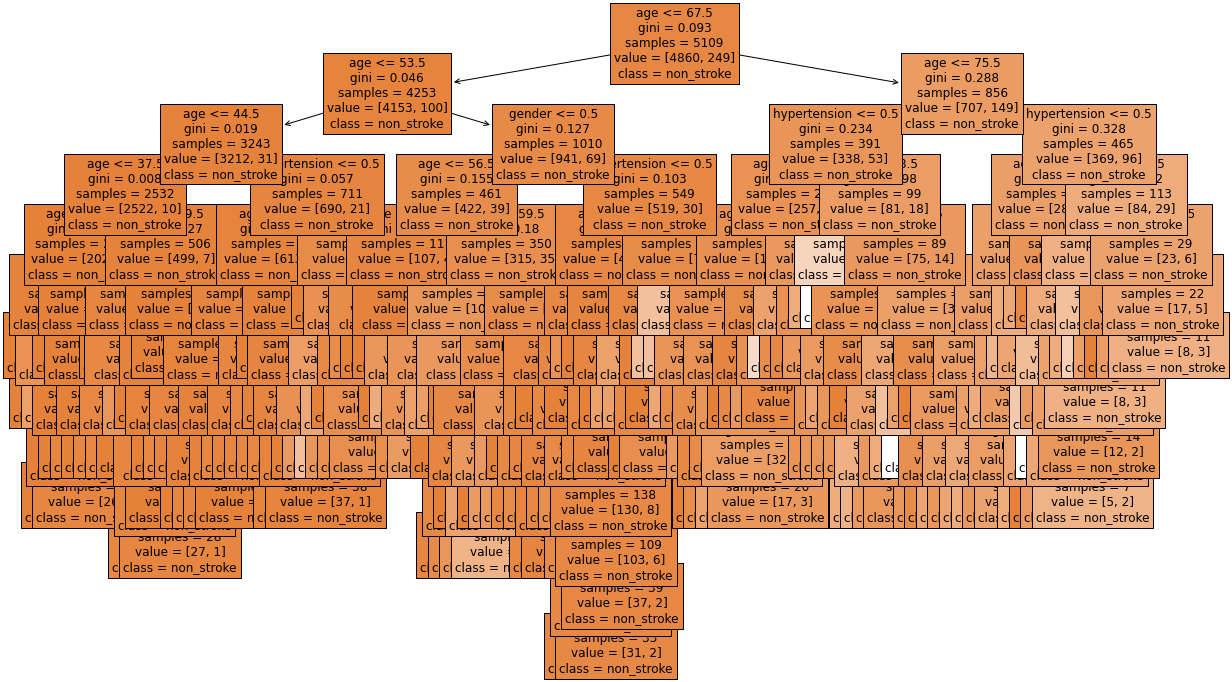

In [91]:
# Example just using 3 features for reading more clearly
X_visual = X.iloc[:,0:3]
dt_visual = model.fit(X_visual,y)
from sklearn import tree
plt.figure(figsize = (20,12))
tree.plot_tree(dt_visual,
feature_names = X.columns,
class_names = ['non_stroke','stroke'],
filled = True, fontsize = 12)
plt.show()

In [98]:
select_data=df[['age','gender','work_type','Residence_type','smoking_status','avg_glucose_level_cut','bmi_rep','stroke']]

In [99]:
select_data.head()

,age,gender,work_type,Residence_type,smoking_status,avg_glucose_level_cut,bmi_rep,stroke
0,67.0,0,0,1,1,5,36.600000,1
1,80.0,0,0,0,0,3,32.500000,1
2,81.0,0,0,1,1,4,29.000000,1
3,74.0,0,0,0,0,1,27.400000,1
4,78.0,0,0,1,255,5,27.247222,1


In [100]:
select_data.to_csv('Select_Healthcare-Dataset-Stroke-Data.csv',index = False)